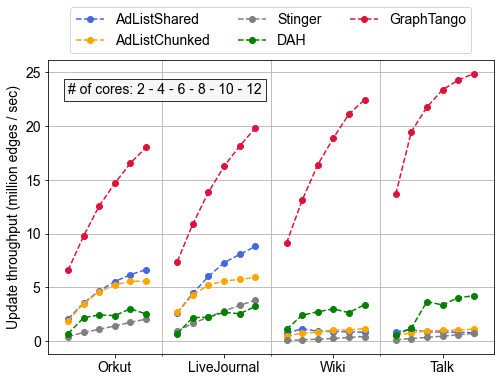

In [3]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import csv


cfile = 'core_sweep.csv'

skipCol = 2
skipRow = 1
cores = [2, 4, 6, 8, 10, 12]
datasets = ['Orkut', 'LiveJournal', 'Wiki', 'Talk']
numEdges = [234.370166, 137.987546, 57.023614, 10.042820]
dsNames = ['AdListShared', 'AdListChunked', 'Stinger', 'DAH', 'GraphTango']
dsColor = ['royalblue', 'orange', 'grey', 'green', 'crimson']

nCores = len(cores)
nSets = len(datasets)
nDS = len(dsNames)

data = np.genfromtxt(cfile, delimiter=',')

f = open("out.csv", "w")

yAll = []
for i in range(nDS):
    f.write(dsNames[i])
    x = [float('nan')]
    for j in range(nSets):
        for k in range(nCores):
            val = numEdges[j] / data[skipRow + nCores*i + k][skipCol + j] / 2.0
            x.append(val)
            f.write(","+str(val))
        x.append(float('nan'))
    yAll.append(x)
    f.write("\n")
    
f.close()

xtickLoc = []
offset = (nCores+2)/2
for i in range(nSets):
    xtickLoc.append(offset + (nCores + 1) * i)

font = {'family' : 'Arial',
        'size'   : 14}
plt.rc('font', **font)
    
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1, 1, 1)
minor_ticks = np.arange(nCores + 1, len(x) - 1, nCores + 1)
ax.set_xticks(minor_ticks, minor=True)
#ax.ticklabel_format(useOffset=False, style='plain')
plt.ylabel('Update throughput (million edges / sec)')

#plt.ylim(0.1, 100)
plt.grid(which='minor', axis='x')
plt.grid(which='major', axis='y')
plt.text(1,23, "# of cores: 2 - 4 - 6 - 8 - 10 - 12", bbox=dict(facecolor='whitesmoke', alpha=0.8))
    
plt.xticks(ticks=xtickLoc, labels=datasets)
#plt.yscale('log')
for i in range(len(yAll)):
    plt.plot(yAll[i], '--o', label=dsNames[i], color=dsColor[i])
    
    
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])

plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1.00),
          ncol=3) #, fancybox=True, shadow=True)

ax.yaxis.set_major_formatter(mticker.ScalarFormatter())
#plt.show()
plt.savefig('core_sweep.pdf', format="pdf", bbox_inches = 'tight') 